## EDA 


Iniciamos nuestra exploración de datos de ambos archivos. El objetivo es encontrar patrones, otliers y cualquier información que nos sea útil para el analisis final. 

In [2]:
#Importamos librerías 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import math



Cargamos nuestros archivos 

In [2]:
df=pd.read_csv("../Limpios/Homicidios_limpio.csv")
df2=pd.read_csv("../Limpios/Lesiones.csv")
df3=pd.read_csv("../Limpios/VictimasLesiones.csv")
df4=pd.read_csv("../Limpios/vic_hom.csv")

## Iniciamos nuestra exploración con los primeros dos archivos, df y df2, ambas hojas del homicidios

In [26]:
df.head()

,Unnamed: 0,ID,N_VICTIMAS,AAAA,MM,HH,TIPO_DE_CALLE,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO
0,0,2016-0001,1,2016,1,4.0,AVENIDA,8.0,Point (98896.78238426 93532.43437792),-58.475340,-34.687570,MOTO-AUTO,MOTO,AUTO
1,1,2016-0002,1,2016,1,1.0,GRAL PAZ,9.0,Point (95832.05571093 95505.41641999),-58.508775,-34.669777,AUTO-PASAJEROS,AUTO,PASAJEROS
2,2,2016-0003,1,2016,1,7.0,AVENIDA,1.0,Point (106684.29090040 99706.57687843),-58.390403,-34.631894,MOTO-AUTO,MOTO,AUTO
3,3,2016-0004,1,2016,1,0.0,AVENIDA,8.0,Point (99840.65224780 94269.16534422),-58.465039,-34.680930,MOTO-SD,MOTO,NaN
4,4,2016-0005,1,2016,1,5.0,AVENIDA,1.0,Point (106980.32827929 100752.16915795),-58.387183,-34.622466,MOTO-PASAJEROS,MOTO,PASAJEROS


In [14]:
df.drop(columns=["Unnamed: 0"], inplace=True)

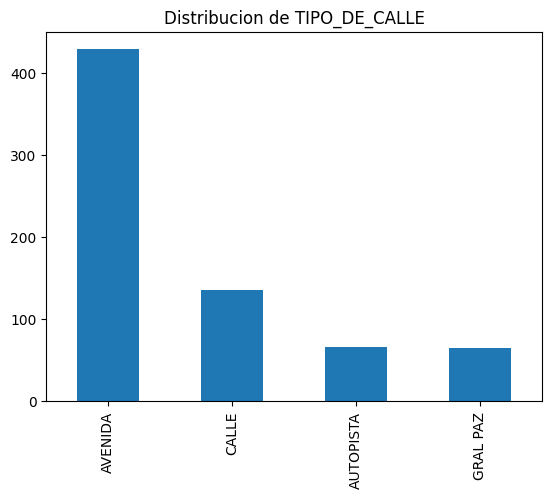

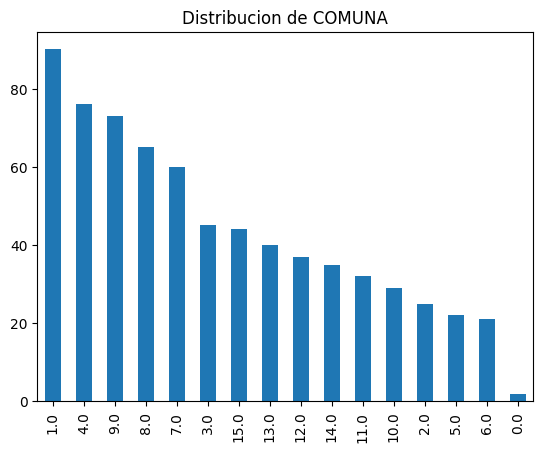

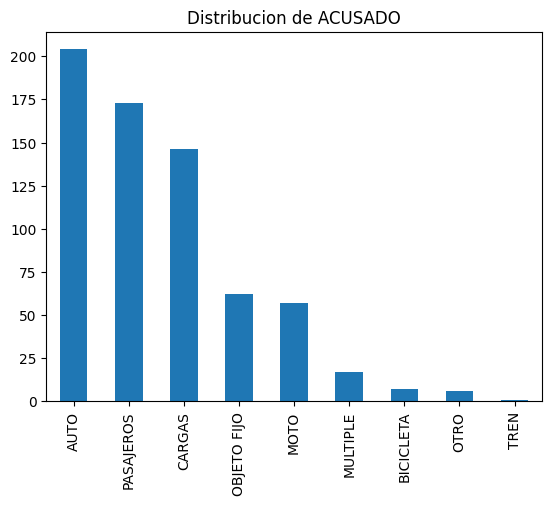

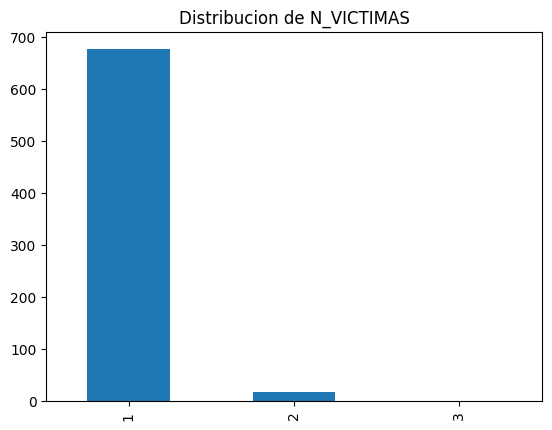

In [8]:
#definir columnas para sacar los graficos
columnas1=["TIPO_DE_CALLE","COMUNA","ACUSADO","N_VICTIMAS"]
#ver las frecuencias de los datos categoricos de la primera tabla df1
for col in columnas1:
    df[col].value_counts().plot(kind='bar',title="Distribucion de "+str(col),)
    plt.show()


Hacemos una distribución del sexo 

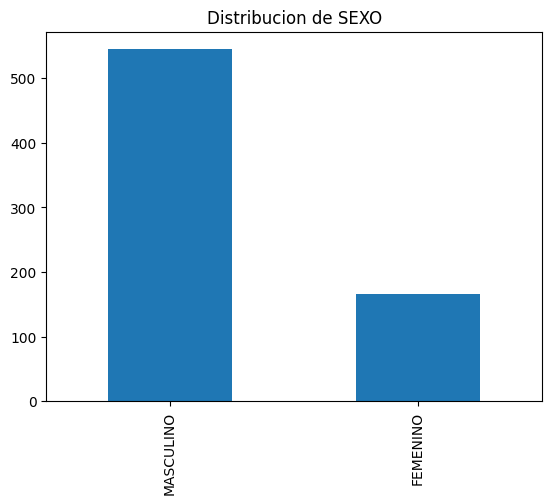

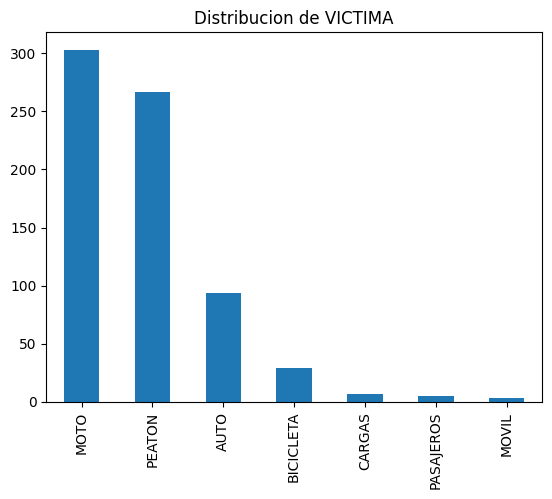

In [9]:
columnas4=["SEXO","VICTIMA"]#"ROL_VICTIMA"

#ver las frecuencias de los datos categoricos de la primera tabla df_les_vic
for col in columnas4:
    df4[col].value_counts().plot(kind='bar',title="Distribucion de "+str(col))
    plt.show()


Procedemos con una distribución de victimas fatales por siniestro

C:\Users\1\AppData\Local\Temp\ipykernel_10956\3131925512.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df_filtrado, x='N_VICTIMAS', palette="Paired")


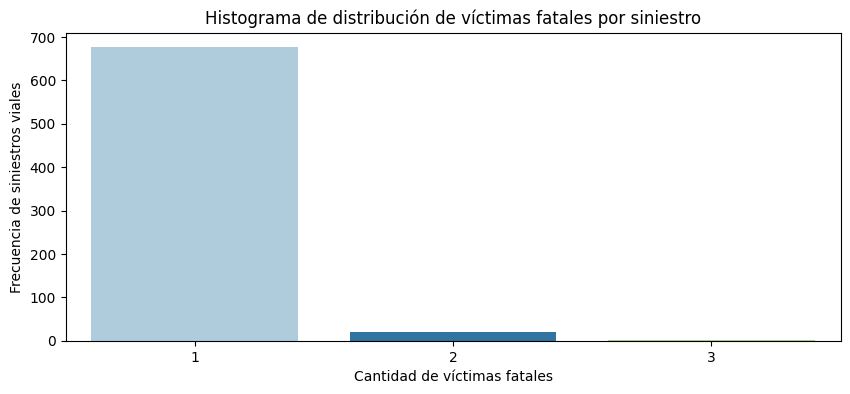

In [30]:
plt.figure(figsize=(10, 4))
# se filtran los valores sin datos o nulos 
df_filtrado = df[df["N_VICTIMAS"] != 0]

#Se cuentan los datos de la columna y se calcula la frecuencia en que se distribuye
sns.countplot(df_filtrado, x='N_VICTIMAS', palette="Paired")

plt.ylabel("Frecuencia de siniestros viales")
plt.xlabel("Cantidad de víctimas fatales")
plt.title("Histograma de distribución de víctimas fatales por siniestro")

plt.show()

Con este analisis preliminar, concluimos el genero de las victimas, los vehículos y la edad con mayor incidencia. Con esto en mente, procedemos a realizar un esudio a profundidad de la estadistica de nuestros datos

Ahora analizamos de cerca los meses con más incidencias

C:\Users\1\AppData\Local\Temp\ipykernel_13692\1989446970.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='MM', y='N_VICTIMAS', data=data, palette="summer")


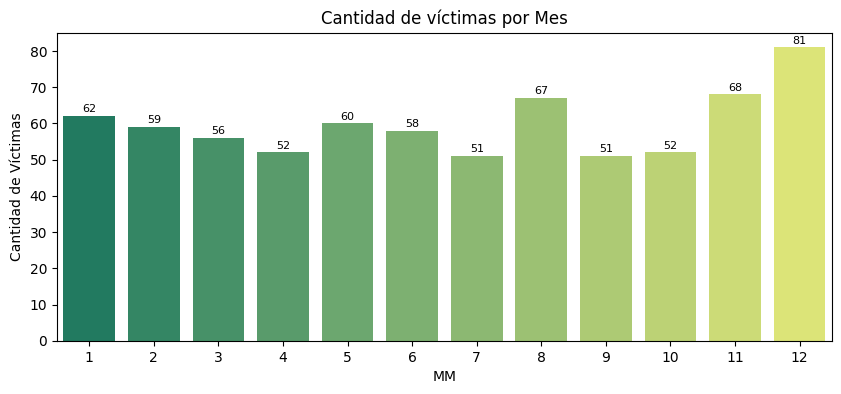

In [18]:
# Se agrupa por la cantidad de víctimas por mes
data = df.groupby(['MM'])['N_VICTIMAS'].sum().reset_index()
data["MM"]=data["MM"].astype("Int64")

# Se grafica
plt.figure(figsize=(10,4))

ax = sns.barplot(x='MM', y='N_VICTIMAS', data=data, palette="summer")
ax.set_title('Cantidad de víctimas por Mes')
ax.set_xlabel('MM') ; ax.set_ylabel('Cantidad de Víctimas')

# Agregar etiquetas de número de víctimas en cada barra
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=8, color='black', xytext=(0, 5),
                textcoords='offset points')

# Se muestra el gráfico
plt.show()

Podemos ver una tendencia durante el mes de diciembre, aquello podría estar relacionado a las vacaciones. Fiestas, las calles son transitadas de formas distintas a las habituales, entre otras variables de caós.

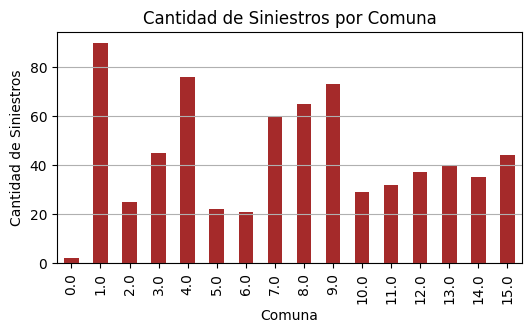

In [21]:
plt.figure(figsize=(6, 3))
df['COMUNA'].value_counts().sort_index().plot(kind='bar', color='brown')
plt.title('Cantidad de Siniestros por Comuna')
plt.xlabel('Comuna')
plt.ylabel('Cantidad de Siniestros')
plt.grid(axis='y')
plt.show()

## Otliers

Después de la exploración, llegamos al a conclusión de que, para nuestro analisis, necesitamos algunos datos más. 

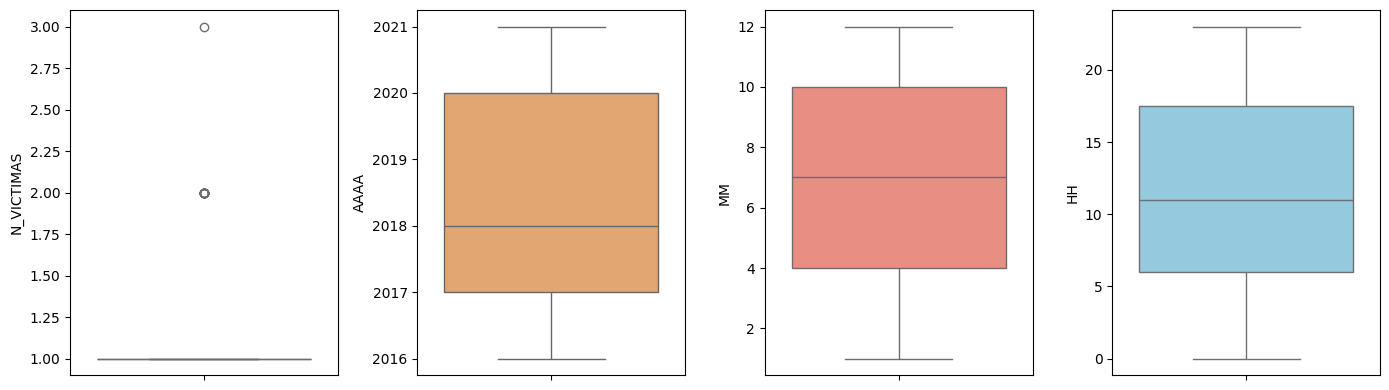

In [12]:
# Ajustar el tamaño de la figura
fig, axes = plt.subplots(1, 4, figsize=(14, 4))

# Lista de columnas para los boxplots
columnas = ['N_VICTIMAS', 'AAAA', 'MM','HH']
colores = ["#FA8072", "#F4A460", "#FA8072", "#87CEEB"]

# Crear subplots para los gráficos
for i, columna in enumerate(columnas):
    sns.boxplot(data=df, y=columna, color=colores[i], ax=axes[i])
    axes[i].set_ylabel(columna)

# Ajustar espaciado entre subplots
plt.tight_layout()

plt.show()

Iniciemos un analisis profundo sobre roles, sexo y vehiculos de las victimas y acusados. El objetivo es determinar si el indice de accidentes se debe a un constructo social o es directamente proporcional a la cantidad de habitantes por metro cuadrado en argentina. Para esto nos ayudaremos de un set de datos adicional, sobre la cantidad de habitantes

C:\Users\1\AppData\Local\Temp\ipykernel_10956\1115033530.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.countplot(df, x="PARTICIPANTES", palette="winter")


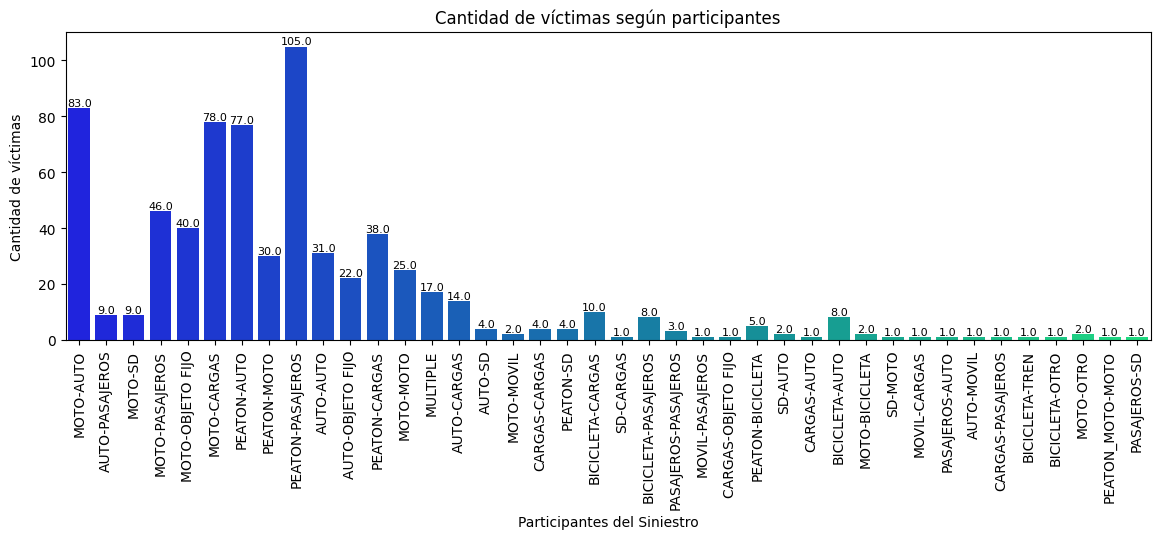

In [82]:
#Se crea el gráfico de barras
plt.figure(figsize=(14, 4))

ax=sns.countplot(df, x="PARTICIPANTES", palette="winter")

# Agrega el número de víctimas en las barras
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom', fontsize=8)

#Se ubican los titulos de las barras en 90 grados
plt.xticks(rotation=90)

#Se titulan los ejes
plt.xlabel('Participantes del Siniestro')
plt.ylabel('Cantidad de víctimas')
plt.title('Cantidad de víctimas según participantes')

plt.show()

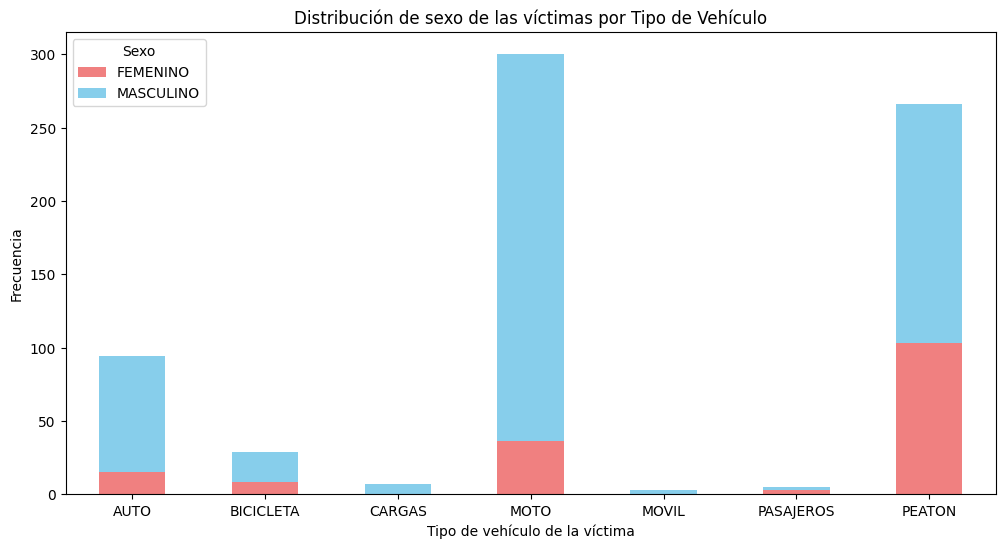

In [81]:
# Crear una tabla de contingencia y un gráfico de barras apiladas
ax = pd.crosstab(df4['VICTIMA'], df4['SEXO']).plot(kind='bar', stacked=True, figsize=(12, 6), color=["lightcoral",'skyblue'])

# Configurar el gráfico
ax.set_title('Distribución de sexo de las víctimas por Tipo de Vehículo')
ax.set_xlabel('Tipo de vehículo de la víctima')
ax.set_ylabel('Frecuencia')

# Agregar una leyenda
ax.legend(title='Sexo')

# Ajustar las etiquetas del eje x
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

plt.show()


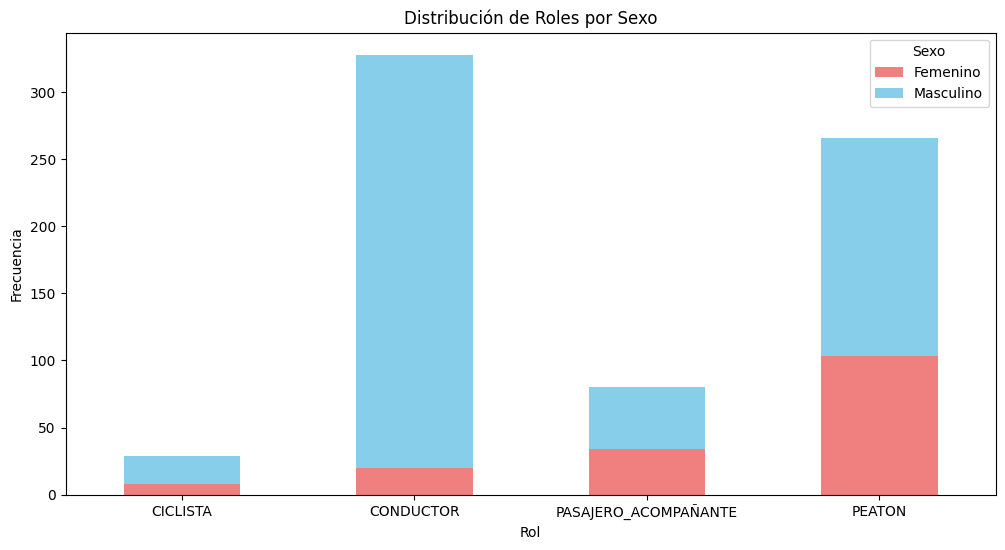

In [80]:
# Crear una tabla de contingencia
tabla_contingencia = pd.crosstab(df4['ROL'], df4['SEXO'])

# Crear un gráfico de barras apiladas
ax = tabla_contingencia.plot(kind='bar', stacked=True, figsize=(12, 6), color=["lightcoral",'skyblue'])
plt.title('Distribución de Roles por Sexo')
plt.xlabel('Rol')
plt.ylabel('Frecuencia')

# Agregar una leyenda
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles=handles, labels=['Femenino', 'Masculino'], title='Sexo')

plt.xticks(rotation=0)
plt.show()

Con este analisis, hago hincapie en la posibilidad de, dado la estadistica, la cantidad de victimas masculinas podría deberse a un constructo social. A la conducción irresponsable, el manejo bajo sustancias psicotropicas, entre otras

C:\Users\1\AppData\Local\Temp\ipykernel_10956\3749354979.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.countplot(df, x="ACUSADO", palette="winter")


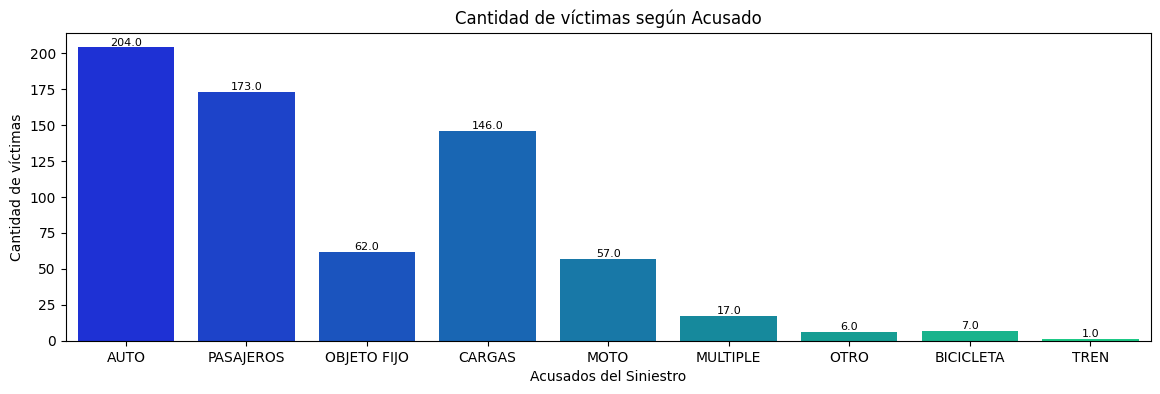

In [79]:
#Se crea el gráfico de barras
plt.figure(figsize=(14, 4))

ax=sns.countplot(df, x="ACUSADO", palette="winter")

# Agrega el número de víctimas en las barras
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom', fontsize=8)


#Se titulan los ejes
plt.xlabel('Acusados del Siniestro')
plt.ylabel('Cantidad de víctimas')
plt.title('Cantidad de víctimas según Acusado')

plt.show()

Podemos concluir que los autos y autobusos colectivos tienden a producir más accidentes que el resto de los vehículo acusados. Se podría relacionar los acusados directamente con objetos fijos. Sin embargo, se necesataría un estudio más a profundidad para determinarlo. De momento, podemos concluir los tres vehículos que producen más accidentes

## KPIS

# Se opto por trabajar los KPI dentro del EDA, para una optimización del tiempo y relacionarlo con nuestro analisis estadistico.

Con el fin de hacer un analisis adecuado, se llevo acabo una investigación sobre la población total de buenos aires. La población total de la Ciudad Autónoma de Buenos Aires (CABA) fue obtenida del Instituto Nacional de Estadística y Censos (INDEC) de Argentina.

In [4]:
df_kpi=pd.read_csv("../Analisis/Homicidios.csv")


Hacemos un pequeño analisis sobre las victimas por semestre

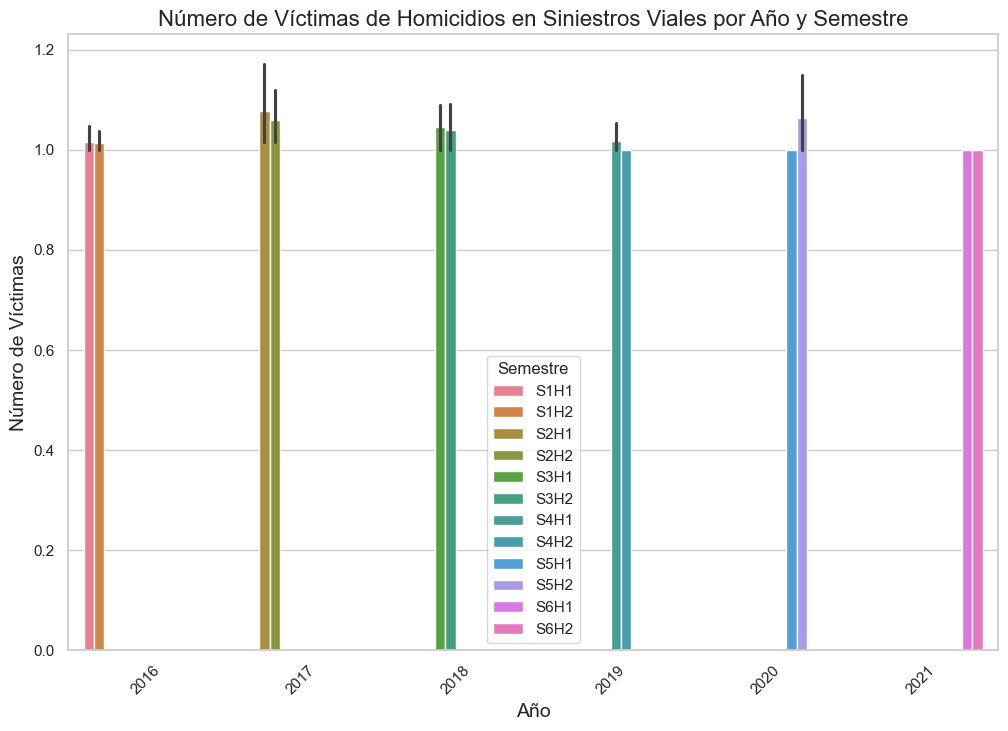

In [5]:
# Establecer un estilo de Seaborn
sns.set(style="whitegrid")

# Crear un gráfico de barras utilizando Seaborn
plt.figure(figsize=(12, 8))
ax = sns.barplot(data=df_kpi, x="AÑO", y="N_VICTIMAS", hue="SEMESTRE", palette="husl")

ax.set_title("Número de Víctimas de Homicidios en Siniestros Viales por Año y Semestre", fontsize=16)
ax.set_xlabel("Año", fontsize=14)
ax.set_ylabel("Número de Víctimas", fontsize=14)
ax.tick_params(axis='x', rotation=45)
ax.legend(title="Semestre")

# Mostrar el gráfico
plt.show()


In [4]:
# Agrupar por año ("AAAA") y semestre, y sumar el número de víctimas
kpi = df_kpi.groupby(["AÑO", "SEMESTRE"])["N_VICTIMAS"].sum().reset_index()

# Calcular la tendencia de víctimas por cada 100,000 habitantes
kpi["TENDENCIA"] = kpi["N_VICTIMAS"] / 3120612 * 100000

# Mostrar el DataFrame resultante
kpi


,AÑO,SEMESTRE,N_VICTIMAS,TENDENCIA
0,2016,S1H1,65,2.082925
1,2016,S1H2,81,2.595645
2,2017,S2H1,69,2.211105
3,2017,S2H2,71,2.275195
4,2018,S3H1,70,2.243150
5,2018,S3H2,79,2.531555
6,2019,S4H1,57,1.826565
7,2019,S4H2,47,1.506115
8,2020,S5H1,31,0.993395
9,2020,S5H2,50,1.602250


In [5]:
# Calcular el índice de víctimas por cada 100,000 habitantes (TENDENCIA)
kpi["TENDENCIA"] = kpi["N_VICTIMAS"] / 3120612 * 100000

# Calcular el cambio porcentual con respecto al periodo anterior (PORCENTAJE)
kpi["PORCENTAJE"] = kpi["TENDENCIA"].pct_change() * 100

# Mostrar el DataFrame resultante
kpi


,AÑO,SEMESTRE,N_VICTIMAS,TENDENCIA,PORCENTAJE
0,2016,S1H1,65,2.082925,NaN
1,2016,S1H2,81,2.595645,24.615385
2,2017,S2H1,69,2.211105,-14.814815
3,2017,S2H2,71,2.275195,2.898551
4,2018,S3H1,70,2.243150,-1.408451
5,2018,S3H2,79,2.531555,12.857143
6,2019,S4H1,57,1.826565,-27.848101
7,2019,S4H2,47,1.506115,-17.543860
8,2020,S5H1,31,0.993395,-34.042553
9,2020,S5H2,50,1.602250,61.290323


In [6]:
# Filtrar los meses donde se cumplió el KPI (cambio porcentual menor a -10)
cumplimiento_kpi = kpi[kpi["PORCENTAJE"] < -10].reset_index(drop=True)

# Mostrar el DataFrame resultante
cumplimiento_kpi


,AÑO,SEMESTRE,N_VICTIMAS,TENDENCIA,PORCENTAJE
0,2017,S2H1,69,2.211105,-14.814815
1,2019,S4H1,57,1.826565,-27.848101
2,2019,S4H2,47,1.506115,-17.543860
3,2020,S5H1,31,0.993395,-34.042553
4,2021,S6H2,42,1.345890,-23.636364


## Reducción del 7% incidentes mortales en motocilcetas


## Estrategias de Implementación

Este indicador es esencial para evaluar la seguridad vial de los motociclistas en CABA. Para lograr la reducción esperada, se implementarán estrategias centradas en mejorar la seguridad de los motociclistas en las vías y reducir la frecuencia de accidentes fatales en la ciudad.



In [7]:
# Filtrar los datos para accidentes mortales de motociclistas
accidentes_motociclistas = df_kpi[df_kpi['VICTIMA'] == 'MOTO']

# Calcular la cantidad de accidentes mortales de motociclistas para cada año
accidentes_motociclistas_anio = accidentes_motociclistas.groupby('SEMESTRE')['ID'].count()

# Calcular la reducción en la cantidad de accidentes mortales de motociclistas
reduccion_accidentes_motociclistas = (
    (accidentes_motociclistas_anio.shift(-1) - accidentes_motociclistas_anio) / 
    accidentes_motociclistas_anio
) * 100


In [8]:
reduccion_accidentes_motociclistas

SEMESTRE
S1H1    28.571429
S1H2   -16.666667
S2H1   -23.333333
S2H2    13.043478
S3H1    11.538462
S3H2    -3.448276
S4H1   -21.428571
S4H2   -45.454545
S5H1    25.000000
S5H2    86.666667
S6H1   -35.714286
S6H2          NaN
Name: ID, dtype: float64

In [ ]:
df7=pd.DataFrame

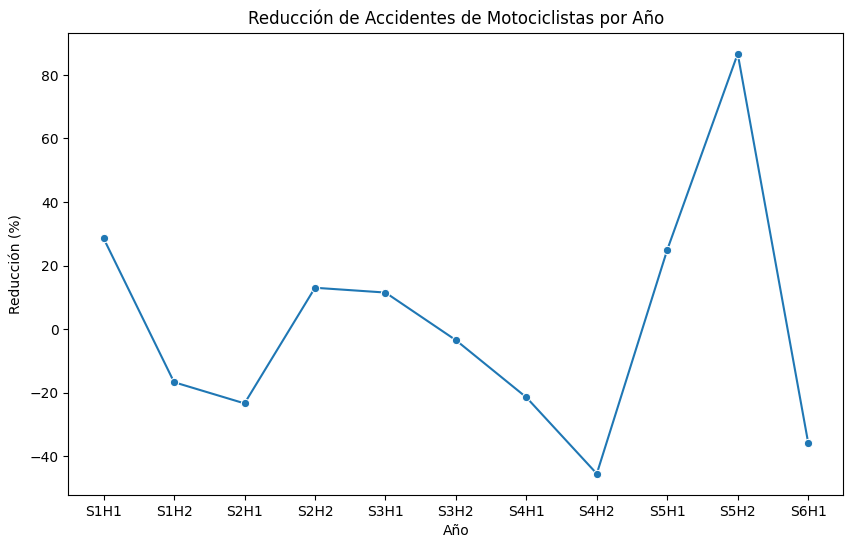

In [9]:
# Crear un gráfico de línea con puntos
plt.figure(figsize=(10, 6))
sns.lineplot(x=reduccion_accidentes_motociclistas.index, y=reduccion_accidentes_motociclistas, marker='o')

# Añadir etiquetas y título
plt.xlabel('Año')
plt.ylabel('Reducción (%)')
plt.title('Reducción de Accidentes de Motociclistas por Año')

# Mostrar el gráfico
plt.show()

Mientras en el 2019 los primero dos semestres hubo una baja en los accidentes, manteniendo así el KPI, se dispararon de nuevo los dos semestres del año 2020 y se redujeron durante el primer semestre del año 2021

Calculamos la tasa anual

In [36]:
tasaAnual = df_kpi.groupby("AÑO")["N_VICTIMAS"].sum().reset_index()

# Calcular la tasa anual de accidentes mortales de moto
tasaAnual["AMM"] = ((tasaAnual["N_VICTIMAS"].shift(1) - tasaAnual["N_VICTIMAS"]) / tasaAnual["N_VICTIMAS"].shift(1) * 100).fillna(0)


In [ ]:
tasaAnual

Analisamos un poco más la tasa anual

In [37]:
media_AMM = tasaAnual["AMM"].mean()
std_dev_AMM = tasaAnual["AMM"].std()

In [40]:
media_AMM

5.040776348339198

In [39]:
std_dev_AMM

18.42365018640407

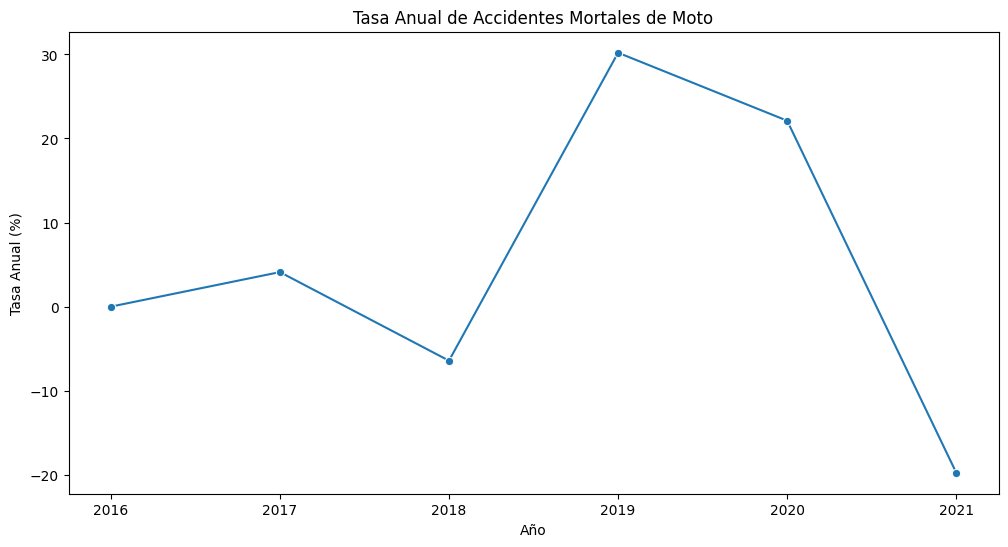

C:\Users\1\AppData\Local\Temp\ipykernel_3844\3536081648.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="AÑO", y="N_VICTIMAS", data=tasaAnual, palette='viridis')


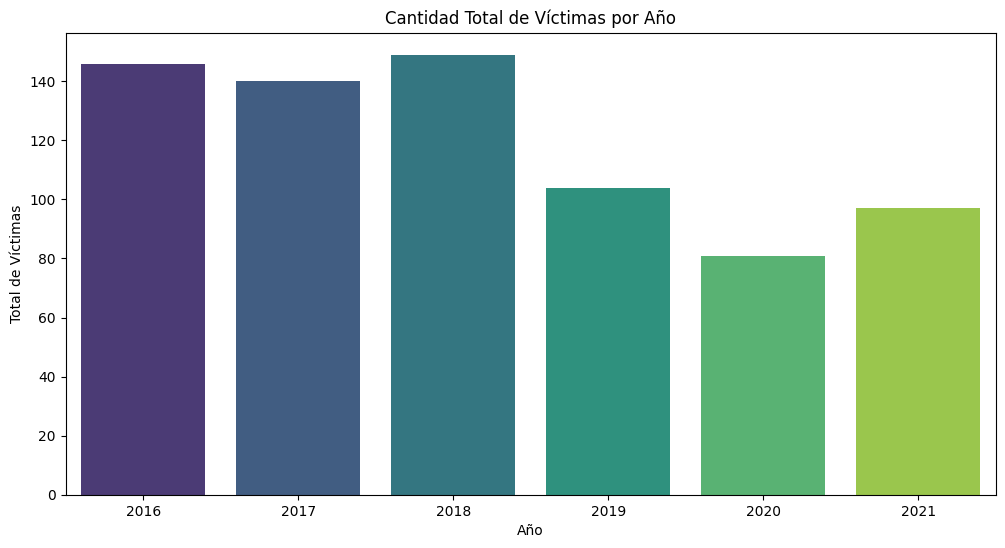

In [41]:
# Gráfico de línea para la tasa anual de accidentes mortales de moto
plt.figure(figsize=(12, 6))
sns.lineplot(x="AÑO", y="AMM", data=tasaAnual, marker='o')
plt.title('Tasa Anual de Accidentes Mortales de Moto')
plt.xlabel('Año')
plt.ylabel('Tasa Anual (%)')
plt.show()

# Gráfico de barras para la cantidad total de víctimas por año
plt.figure(figsize=(12, 6))
sns.barplot(x="AÑO", y="N_VICTIMAS", data=tasaAnual, palette='viridis')
plt.title('Cantidad Total de Víctimas por Año')
plt.xlabel('Año')
plt.ylabel('Total de Víctimas')
plt.show()

Como se puede observar el KPI se cumplió para el año 2019 y 2020 respectivamente. El número de incidentes bajo considerablemente en 2019, a ello parecé que la pandemia del COVID-19, mantuvo un poco el margen en 2020, volviendo a alzarse en 2021. El año con mayor incidentes fue 2018.

## Conclusiones 

Si bien es cierto que la pandemia fue una influencia en la disminución de accidentes, no lo fue para el caso de los motocilcistas. A su vez se puede notar una mayor incidencia en victimas mortales en el sexo masculino.

Se podría optar por iniciar una campaña de concientización vial, estableciendo ciertas metricas. También se podría optar por una politica más rigida en la conducción bajo sustancias o a velocidades imprudentes. 